We start by importing the necessary libraries and the dataset requred for the project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
# import data
df = pd.read_csv('../data/birds.csv')
print(df.head())

                           Name          ScientificName  \
0  Black-bellied whistling-duck  Dendrocygna autumnalis   
1        Fulvous whistling-duck     Dendrocygna bicolor   
2                    Snow goose      Anser caerulescens   
3                  Ross's goose            Anser rossii   
4   Greater white-fronted goose         Anser albifrons   

                Category         Order    Family        Genus  \
0  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
1  Ducks/Geese/Waterfowl  Anseriformes  Anatidae  Dendrocygna   
2  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
3  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   
4  Ducks/Geese/Waterfowl  Anseriformes  Anatidae        Anser   

  ConservationStatus  MinLength  MaxLength  MinBodyMass  MaxBodyMass  \
0                 LC       47.0       56.0        652.0       1020.0   
1                 LC       45.0       53.0        712.0       1050.0   
2                 LC       64.0       

Let get a general sense of the data by plotting the number of birds per Genus using scatter plot.

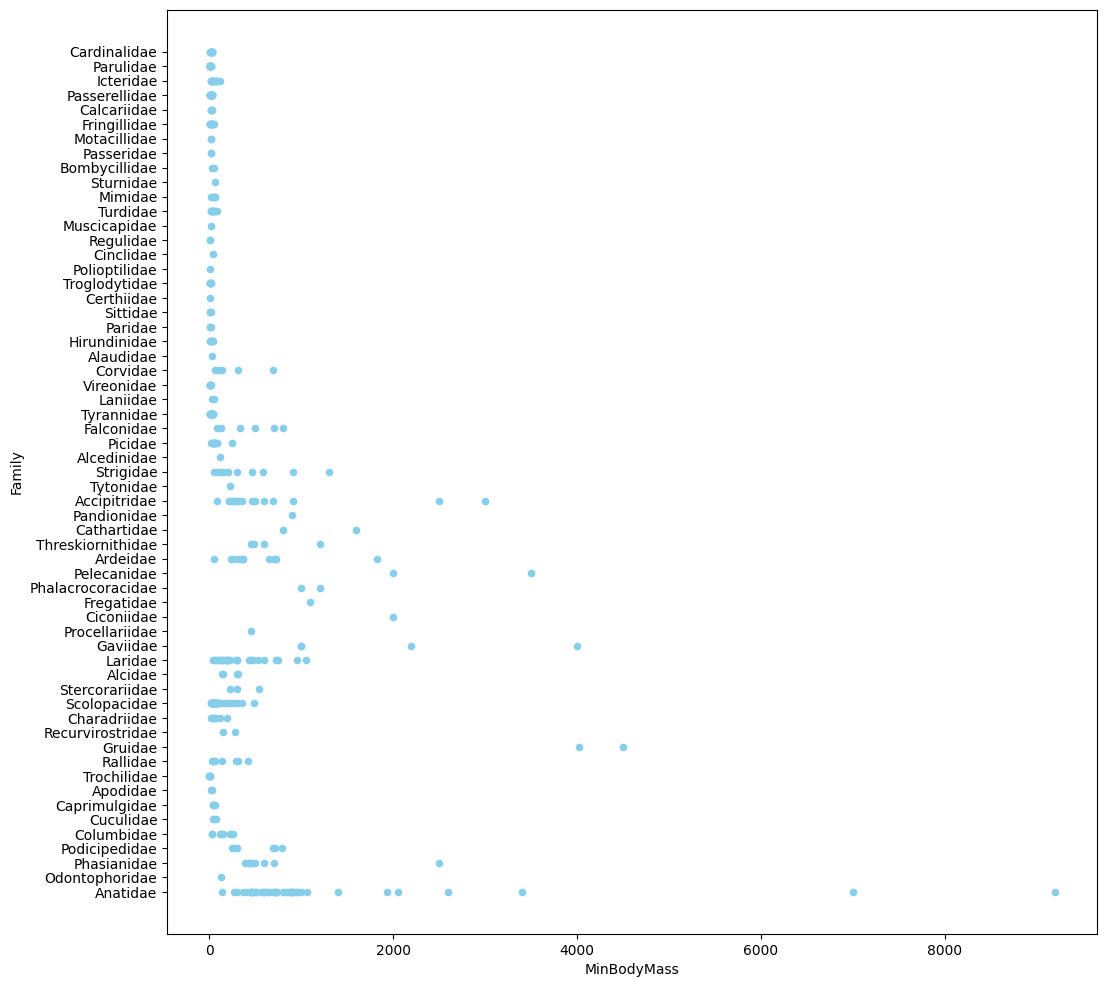

In [14]:
import matplotlib.pyplot as plt
df.plot(x='MinBodyMass',y='Family', kind='scatter', figsize=(12, 12), color='skyblue')
plt.show()

The visualization above gives us an idea of the distribution of the data but it not the ideal way to represent such distribution instead we use a histogram to clearly observe the patterns of our data. The graph shows that most of the data points are concentrated below 2000 minBodyMass.

## Working with histograms

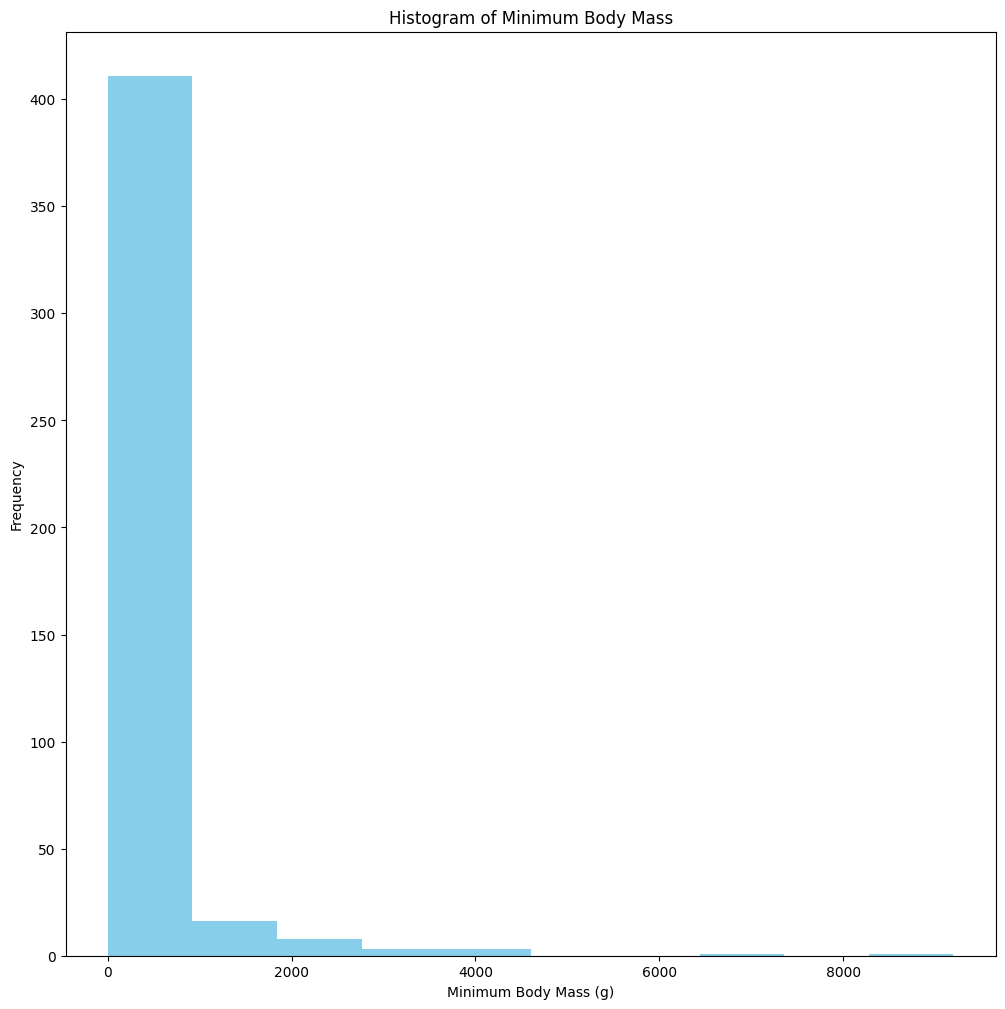

In [19]:
df['MinBodyMass'].plot(kind='hist', figsize=(12, 12), color='skyblue')
plt.title('Histogram of Minimum Body Mass')
plt.xlabel('Minimum Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

From the graph, most of the 400+ birds in this dataset fall in the range of under 2000 on the Min Body Mass. Let gain more insite by adjusting the bin size to obatin the approximate vale of min body mass of birds

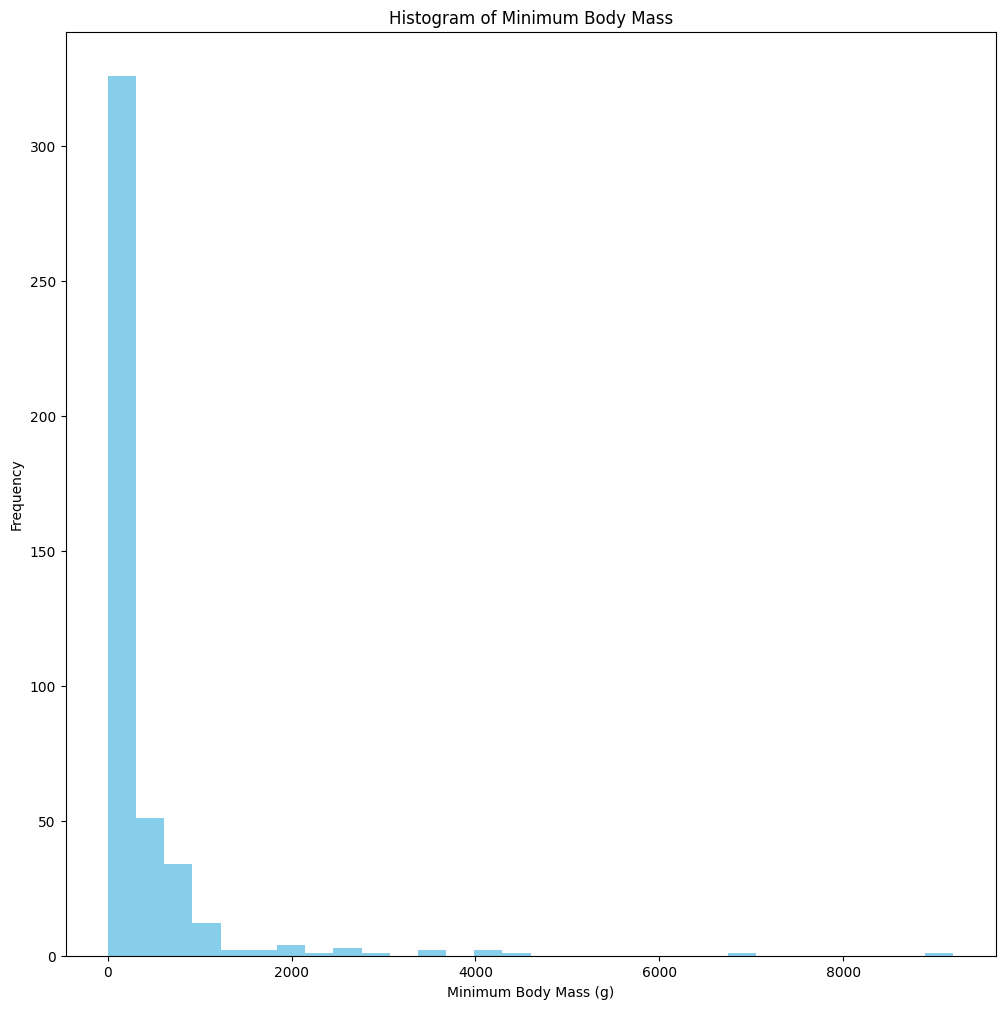

In [20]:
df['MinBodyMass'].plot(kind='hist', figsize=(12, 12), color='skyblue',bins=30)
plt.title('Histogram of Minimum Body Mass')
plt.xlabel('Minimum Body Mass (g)')
plt.ylabel('Frequency')
plt.show()

We observed the minimum body mass from the graph is left skewed and that the highest frequency of the bar falls within 0-60 of the minimum Body mass. Now let filter out the minimum body mass between 0 to 60 to gain more insite.

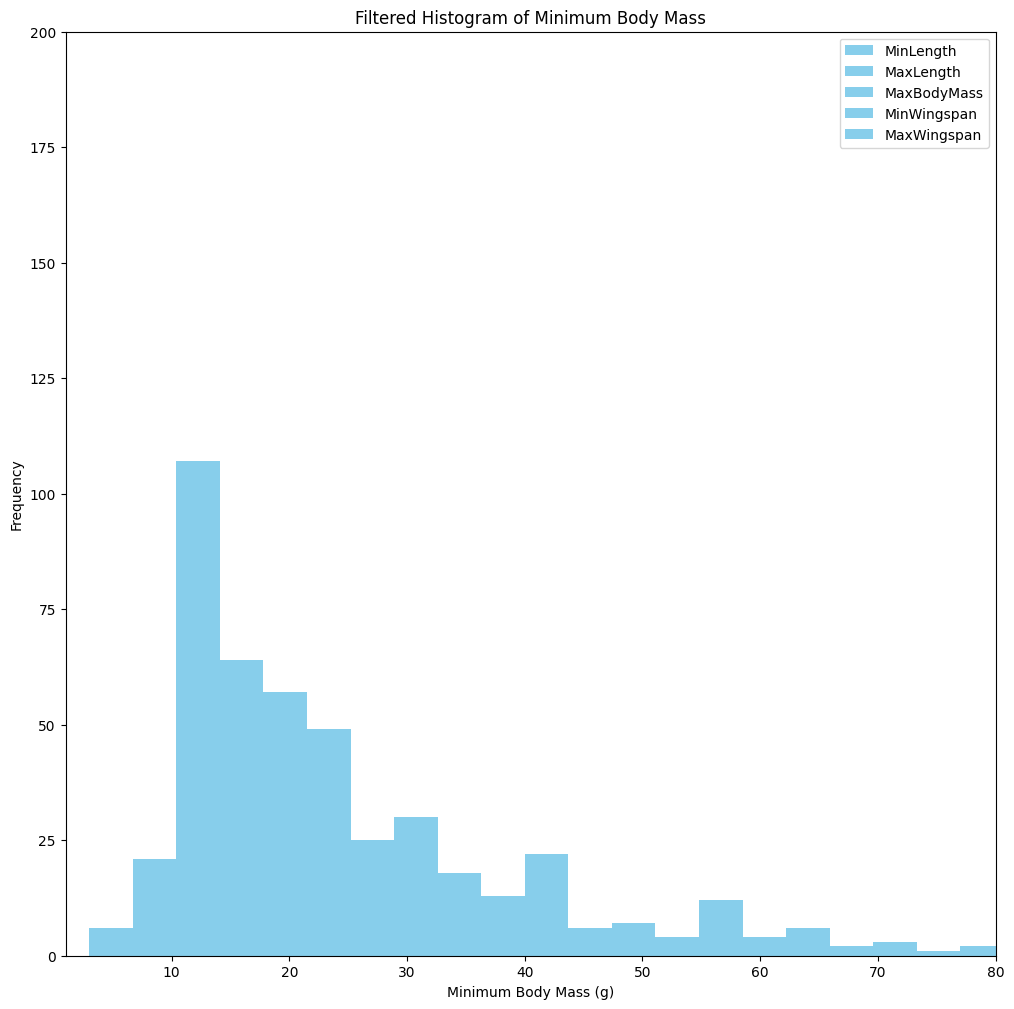

In [27]:
filtered_df = df[(df['MinBodyMass'] >1) & (df['MinBodyMass'] < 60)]
filtered_df.plot(x='MinBodyMass', kind='hist', figsize=(12, 12), color='skyblue',bins=40)
plt.title('Filtered Histogram of Minimum Body Mass')
plt.xlabel('Minimum Body Mass (g)')
plt.ylabel('Frequency')
plt.xlim(1, 80)
plt.ylim(0, 200)
plt.show()

Below is a 2D histogram to compare the relationship between two distributions. Let's compare MinBodyMass vs. MinLength. Matplotlib offers a built-in way to show convergence using brighter colors:

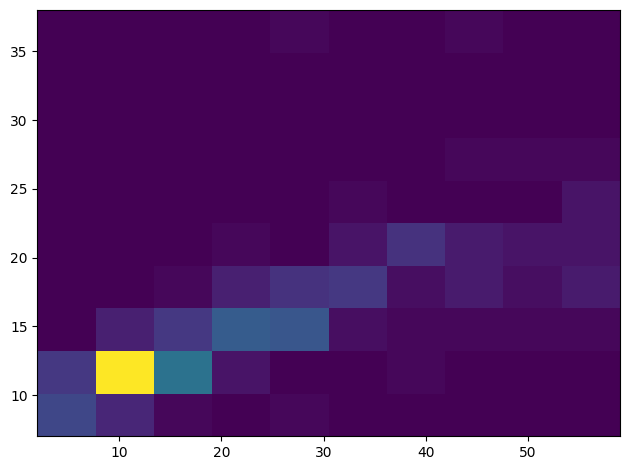

In [41]:
x = filtered_df['MinBodyMass']
y = filtered_df['MinLength']

fig, ax = plt.subplots(tight_layout=True)
hist = ax.hist2d(x, y)

From the histogram above, there appears to be an expected correlation between these two elements along an expected axis, with one particularly strong point of convergence:



Histograms work well by default for numeric data. What if you need to see distributions according to text data?

## Explore the dataset for distributions using text data

This dataset also includes good information about the bird category and its genus, species, and family as well as its conservation status. Let's dig into this genus information. What is the distribution of the birds according to their Order?

Since these are text-based values so we will need to do a transform to create a histogram. Using the filtered_df dataframe, display its Order alongside its Maximum Wingspan.

In [49]:
x = filtered_df['Order'].value_counts()
print(x)

Order
Passeriformes       179
Charadriiformes      20
Apodiformes           9
Piciformes            7
Gruiformes            3
Caprimulgiformes      3
Cuculiformes          2
Columbiformes         2
Strigiformes          1
Pelecaniformes        1
Name: count, dtype: int64


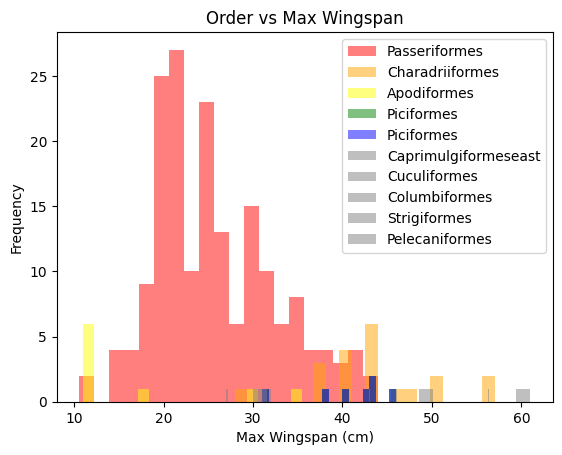

In [52]:

x1 = filtered_df[filtered_df['Order']=='Passeriformes']['MaxWingspan']
x2 = filtered_df[filtered_df['Order']=='Charadriiformes']['MaxWingspan']
x3 = filtered_df[filtered_df['Order']=='Apodiformes']['MaxWingspan']
x4 = filtered_df[filtered_df['Order']=='Piciformes']['MaxWingspan']
x5 = filtered_df[filtered_df['Order']=='Piciformes']['MaxWingspan']
x6 = filtered_df[filtered_df['Order']=='Caprimulgiformes']['MaxWingspan']
x7 = filtered_df[filtered_df['Order']=='Cuculiformes']['MaxWingspan']
x8 = filtered_df[filtered_df['Order']=='Columbiformes']['MaxWingspan']
x9 = filtered_df[filtered_df['Order']=='Strigiformes']['MaxWingspan']
x10 =filtered_df[filtered_df['Order']=='Pelecaniformes']['MaxWingspan']

kwargs = dict(alpha=0.5, bins=20)

plt.hist(x1, **kwargs, color='red', label='Passeriformes')
plt.hist(x2, **kwargs, color='orange', label='Charadriiformes')
plt.hist(x3, **kwargs, color='yellow', label='Apodiformes')
plt.hist(x4, **kwargs, color='green', label='Piciformes')
plt.hist(x5, **kwargs, color='blue', label='Piciformes')
plt.hist(x6, **kwargs, color='gray', label='Caprimulgiformeseast')
plt.hist(x7, **kwargs, color='gray', label='Cuculiformes')
plt.hist(x8, **kwargs, color='gray', label='Columbiformes')
plt.hist(x9, **kwargs, color='gray', label='Strigiformes')
plt.hist(x10, **kwargs, color='gray', label='Pelecaniformes')

#plt.gca().set(title='Conservation Status', ylabel='Min Wingspan')
plt.title('Order vs Max Wingspan')
plt.legend()
plt.xlabel('Max Wingspan (cm)')
plt.ylabel('Frequency')
plt.show()

There doesn't seem to be a good correlation between maximum wingspan and Order

## Density plots

Noticed that the histograms you have looked at so far are 'stepped' and do not flow smoothly in an arc. To show a smoother density chart, we can try a density plot(KDE plot). Let have a look at the minimum body mass(g) of birds from filtered_df using kde plot.


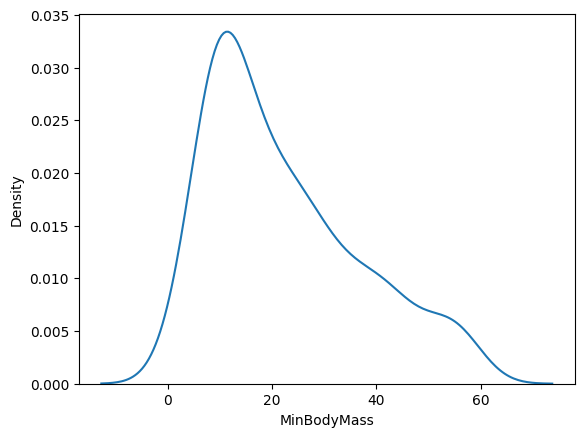

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filtered_df['MinBodyMass'])
plt.show()


You can see how the plot mimic the previous one for Minimum Body Mass data; it's just a bit smoother. This KDE produces a plot that is less cluttered and more interpretable, especially when drawing multiple distributions.

Let make the kde plot smooth at the same time not to smooth using bw_adjust parameter

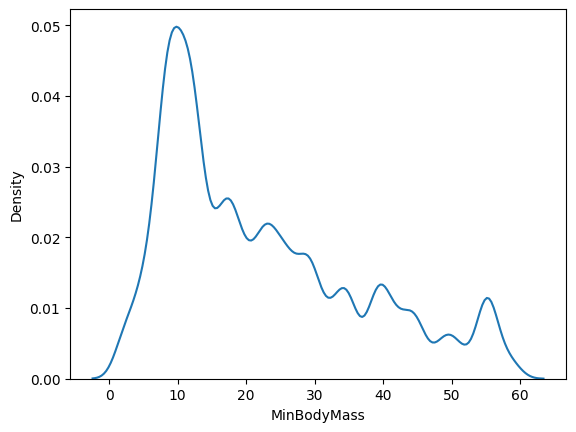

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.kdeplot(filtered_df['MinBodyMass'],bw_adjust=0.3)
plt.show()

To use additional layer of date point in the kde plot, we use the hue and palette parameter to add colors 

C:\Users\Alhaji\AppData\Local\Temp\ipykernel_72396\1284987033.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


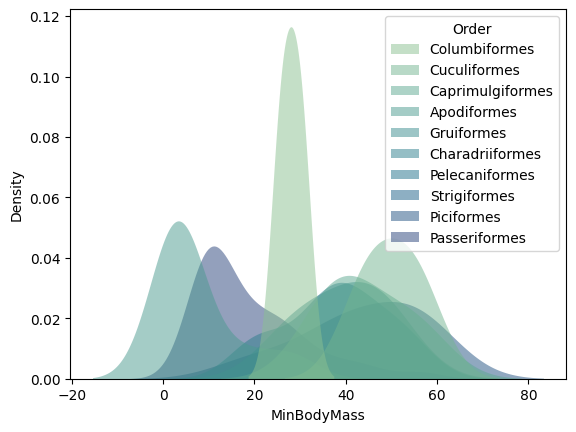

In [39]:
sns.kdeplot(
   data=filtered_df, x="MinBodyMass", hue="Order",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)
plt.show()

We can also map the density of several variables in one chart. Text the MaxBodyMass and MinBodyMass of a bird compared to their Order:

C:\Users\Alhaji\AppData\Local\Temp\ipykernel_72396\74150199.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_df, x="MinBodyMass", y="MaxBodyMass", hue="Order")
C:\Users\Alhaji\AppData\Local\Temp\ipykernel_72396\74150199.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_df, x="MinBodyMass", y="MaxBodyMass", hue="Order")
C:\Users\Alhaji\AppData\Local\Temp\ipykernel_72396\74150199.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=filtered_df, x="MinBodyMass", y="MaxBodyMass", hue="Order")
C:\Users\Alhaji\AppData\Local\Temp\ipykernel_72396\74150199.py:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.

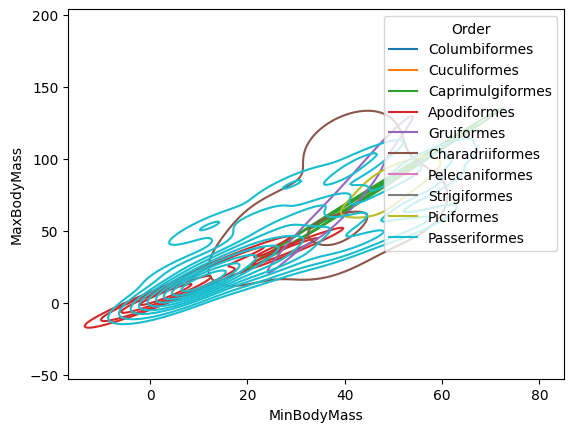

In [62]:
sns.kdeplot(data=filtered_df, x="MinBodyMass", y="MaxBodyMass", hue="Order")
plt.show()